# Project 3 – Eyes Classification
<br>

## Implementing a classifier using a Neural network using Keras Framework to determine gender by eye.




In [56]:
## Importing the neccesary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

import tensorflow as tf 
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import os
import cv2
import random

In [57]:
Directory = "/Users/rehman/Desktop/college stuff/2nd sem/neural networks/Project 3 – Eyes Classification"
Classes = ["maleeyes","femaleeyes"]
## Defining the dimensions of the image
Img_size = 50

As stated above, the dataset has two folders Training and Validation, each having two classes male and female

In [58]:
## Defining the image loading function

data = []

def load_image_data():
    for category in Classes:  

        path = os.path.join(Directory,category)  
        class_num = Classes.index(category) 

        for img in os.listdir(path): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (Img_size, Img_size))  
                data.append([new_array, class_num])  
            except Exception as e:  
                pass
## Loading the images
load_image_data()
data[1:5]

[[array([[191, 193, 192, ...,  81,  95,  97],
         [199, 201, 197, ...,  65,  81,  87],
         [191, 195, 196, ...,  56,  60,  70],
         ...,
         [106, 105, 107, ..., 140, 142, 142],
         [107, 107, 107, ..., 143, 145, 144],
         [107, 108, 109, ..., 147, 148, 145]], dtype=uint8),
  0],
 [array([[200, 186, 182, ..., 186, 188, 184],
         [198, 184, 177, ..., 180, 179, 177],
         [193, 180, 169, ..., 180, 182, 181],
         ...,
         [154, 173, 189, ..., 186, 184, 181],
         [159, 164, 184, ..., 191, 188, 184],
         [168, 167, 184, ..., 192, 190, 188]], dtype=uint8),
  0],
 [array([[ 89, 100, 109, ..., 234, 234, 234],
         [107, 115, 120, ..., 235, 235, 234],
         [127, 121, 115, ..., 236, 235, 234],
         ...,
         [157, 157, 160, ..., 193, 191, 190],
         [159, 160, 161, ..., 197, 193, 191],
         [159, 160, 161, ..., 198, 193, 190]], dtype=uint8),
  0],
 [array([[158, 156, 158, ..., 191, 191, 192],
         [146, 151, 1

In [59]:
## Random shuffleing the data for the model
random.shuffle(data)
## Defining the features x and target y

x = []
y = []

for features,label in data:
    x.append(features)
    y.append(label)

print(x[0].reshape(-1, Img_size, Img_size, 1))

x = np.array(x).reshape(-1, Img_size, Img_size, 1)
y = np.array(y)

[[[[208]
   [216]
   [213]
   ...
   [115]
   [112]
   [121]]

  [[207]
   [206]
   [206]
   ...
   [121]
   [120]
   [119]]

  [[206]
   [204]
   [203]
   ...
   [114]
   [115]
   [122]]

  ...

  [[107]
   [111]
   [115]
   ...
   [156]
   [157]
   [156]]

  [[107]
   [109]
   [112]
   ...
   [155]
   [156]
   [153]]

  [[106]
   [110]
   [116]
   ...
   [154]
   [154]
   [152]]]]


In [60]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)


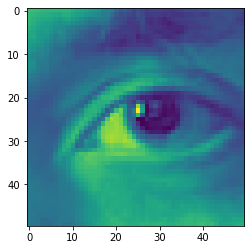

In [61]:
plt.imshow(X_train[10])

## SVM classifier

In [62]:
## SVM classifier

model_svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [63]:
X_test.shape

(3449, 50, 50, 1)

In [64]:
## Reducing dimensionality because Sklearn KNN only takes 2d arrays
x_tr_knn = np.array(X_train).reshape(8045,-1)
y_tr_knn = np .array(y_train)

x_tst_knn = np.array(X_test).reshape(3449, -1)
y_tst_knn = np.array(y_test)

In [65]:
x_tst_knn = np.array(X_test).reshape(3449, -1)

In [66]:
y_test.shape

(3449,)

In [67]:
model_svc.fit(x_tr_knn, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [68]:
y_pred = model_svc.predict(x_tst_knn)

In [69]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("\nAccuracy:",metrics.accuracy_score(y_test, y_pred))
print("\nRecall:",metrics.recall_score(y_test, y_pred))

Precision: 0.8833107191316146

Accuracy: 0.874746303276312

Recall: 0.8335467349551856


In [70]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1715  172]
 [ 260 1302]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1887
           1       0.88      0.83      0.86      1562

    accuracy                           0.87      3449
   macro avg       0.88      0.87      0.87      3449
weighted avg       0.88      0.87      0.87      3449



## Multilayer preceptron model

In [71]:
# Configuration options
feature_vector_length = 2500
num_classes = 2

In [72]:
# Reshape the data - MLPs do not understand such things as '2D'.
# Reshape to 28 x 28 pixels = 784 features
X_train_mlp = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test_mlp = X_test.reshape(X_test.shape[0], feature_vector_length)

In [73]:
X_train_mlp.shape

(8045, 2500)

In [74]:
Y_train_mlp = to_categorical(y_train, num_classes)
Y_test_mlp = to_categorical(y_test, num_classes)

In [75]:
Y_train_mlp.shape

(8045, 2)

In [76]:
input_shape = (feature_vector_length,)

In [77]:
model = Sequential()
model.add(Dense(260, input_shape=input_shape, activation='relu'))
model.add(Dense(140, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [78]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [79]:
history = model.fit(X_train_mlp, Y_train_mlp, epochs=40, batch_size=80, verbose=1, validation_split=0.2)

Epoch 1/40
81/81 [==============================] - 1s 5ms/step - loss: 23.9382 - accuracy: 0.5743 - val_loss: 1.8218 - val_accuracy: 0.7470
Epoch 2/40
81/81 [==============================] - 0s 4ms/step - loss: 9.9452 - accuracy: 0.6210 - val_loss: 2.9053 - val_accuracy: 0.7122
Epoch 3/40
81/81 [==============================] - 0s 4ms/step - loss: 3.8875 - accuracy: 0.6692 - val_loss: 3.2600 - val_accuracy: 0.6532
Epoch 4/40
81/81 [==============================] - 0s 4ms/step - loss: 2.9251 - accuracy: 0.6833 - val_loss: 2.3727 - val_accuracy: 0.7129
Epoch 5/40
81/81 [==============================] - 0s 4ms/step - loss: 3.3544 - accuracy: 0.6796 - val_loss: 2.6124 - val_accuracy: 0.6955
Epoch 6/40
81/81 [==============================] - 0s 4ms/step - loss: 2.8032 - accuracy: 0.6726 - val_loss: 1.2983 - val_accuracy: 0.7763
Epoch 7/40
81/81 [==============================] - 0s 4ms/step - loss: 1.8428 - accuracy: 0.7107 - val_loss: 1.6467 - val_accuracy: 0.7154
Epoch 8/40
81/81 [=

As we can see accuracy have increased from 57 to 84 percent

## Graphical representation

108/108 - 0s - loss: 0.3562 - accuracy: 0.8492 - 150ms/epoch - 1ms/step


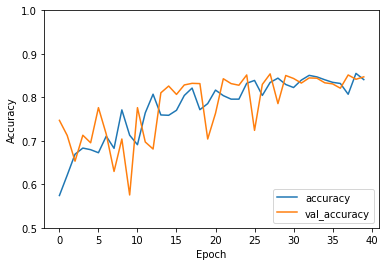

In [82]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test_mlp,  Y_test_mlp, verbose=2)

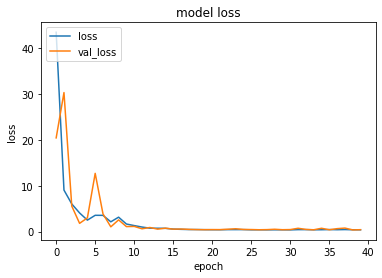

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

## CNN model

In [40]:
model = models.Sequential()


model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape= (50,50,1) ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (2, 2), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))


In [41]:
model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
history = model.fit(X_train, y_train, epochs=7, batch_size= 50,
                    validation_data=(X_test, y_test))

Epoch 1/7


/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"


161/161 [==============================] - 12s 71ms/step - loss: 0.5601 - accuracy: 0.7141 - val_loss: 0.4979 - val_accuracy: 0.7565
Epoch 2/7
161/161 [==============================] - 11s 69ms/step - loss: 0.4323 - accuracy: 0.8011 - val_loss: 0.4075 - val_accuracy: 0.8170
Epoch 3/7
161/161 [==============================] - 11s 68ms/step - loss: 0.3751 - accuracy: 0.8303 - val_loss: 0.3557 - val_accuracy: 0.8466
Epoch 4/7
161/161 [==============================] - 11s 68ms/step - loss: 0.3492 - accuracy: 0.8507 - val_loss: 0.3335 - val_accuracy: 0.8562
Epoch 5/7
161/161 [==============================] - 11s 66ms/step - loss: 0.3209 - accuracy: 0.8636 - val_loss: 0.3193 - val_accuracy: 0.8660
Epoch 6/7
161/161 [==============================] - 11s 67ms/step - loss: 0.3081 - accuracy: 0.8702 - val_loss: 0.2961 - val_accuracy: 0.8768
Epoch 7/7
161/161 [==============================] - 11s 67ms/step - loss: 0.2841 - accuracy: 0.8793 - val_loss: 0.3218 - val_accuracy: 0.8617


108/108 - 1s - loss: 0.3218 - accuracy: 0.8617 - 1s/epoch - 9ms/step


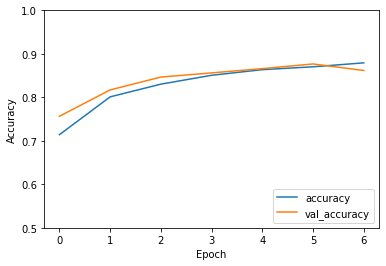

In [43]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

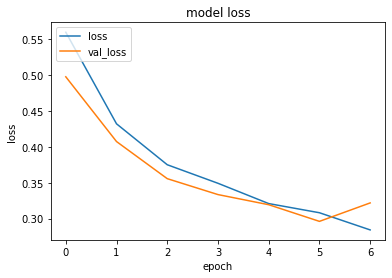

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

# Conclusion

On the whole, this model can help to identify males and females with around 87% accuracy which can further improve with different techniques. It was fairly a simple example where computers learned to identify images of males and females. Various complex datasets are available online which require complex techniques involving augmentations